# Lecture 13: Linear regression

Today we will learn the regression, which is the simpliest model in machine learning.

In previous lab practice, we learned how to import data from [UCI machine learning dataset repository](https://archive.ics.uci.edu/ml/datasets.html). 

* Download `winequality-red.csv` from [UCI machine learning repo on Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/), unzip it and put it in the same directory with this notebook.
* Check the csv file using Excel on the lab computer. Import the data using the following command.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Check the [csv preview on Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009), we will use the first three columns: `fixed acidity`, `volatile acidity`, and `citric acid`, we are interested how these every two quantities are related.

In [8]:
wine_data = pd.read_csv('winequality-red.csv',sep=';')

In [9]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


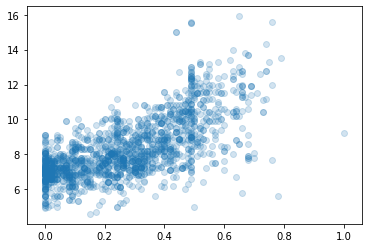

In [10]:
plt.scatter(wine_data['citric acid'], wine_data['fixed acidity'], alpha=0.2)  
# alpha makes the dots a little transparent
plt.show()

## Question 1: fixed acidity vs citric acid concentration

We would like to fit a line to this data. i.e., based on this information, what is the most likely linear relationship between the fixed acid and citric acid concentration of wine?

Since we are doing a linear model: if $x$ is the citric acid concentration, then the fixed acidity $y$ should be 

$$ y = w x + b.$$

So we are looking for $w$ (weight) and $b$ (bias) that will fit the line as well as possible to the data. What does that mean though? It means that we want to minimize the error that our linear model $y = wx + b$ will have on predicting the weight from the height on our existing data. On a fixed acidity-citric acid concentration pair $(x_i, y_i)$ from our data-set, the model is guessing $y = w x_i + b$, and the actual answer is $y_i$. The total squared error (called *Loss*) is:

$$L(w,b) = \sum_{i=1}^{N} \Big((w x_i + b) - y_i\Big)^2$$

where $\{(x_i, y_i)\}$ are our fixed acidity-citric acid concentration pairs. 

* "Why squared error and not sum of absolute values?" we might ask, both are good options. There are good reasons to go for squared error as the first choice.

We want to minimize this squared error function above. We can:

* Solve $\nabla_{w,b} L(w,b) = 0$. The gradient will be zero at a local minimum.
* Use gradient descent.

**Remark**: the loss function is a function in $w$ and $b$, not $x$ and $y$!!!!.

## Reading: solving $\nabla_{w,b} L(w,b) = 0$: 

Solving the gradient = 0. You write down the partial derivatives and solve the linear equations for $w$ and $b$. 
$$\frac{\partial}{\partial b} L(w,b) = 2  \sum\limits_{i=1}^N \big(w x_i + b-y_i\big) = 0$$

$$\frac{\partial}{\partial w} L(w,b) = 2  \sum\limits_{i=1}^N (w x_i + b-y_i) \cdot x_i) = 0$$

Simplifying the first equation is straightforward:
$$wX + Nb − Y = 0, \quad \text{where} \quad X = \sum\limits_{i=1}^N x_i, \quad Y = \sum\limits_{i=1}^N y_i .$$
Simplifying the second equaton:
$$
w\sum\limits_{i=1}^N x_i^2 - b\sum\limits_{i=1}^N x_i -  \sum\limits_{i=1}^N x_i y_i
= wA + bX - C = 0, 
\quad \text{where} \quad A = \sum\limits_{i=1}^N x_i^2, \quad C = \sum\limits_{i=1}^N x_i y_i.
$$
Solving this linear system yields:
$$
w = \frac{XY - nC}{X^2 - NA}, \quad \text{ and } \quad b = \frac{AY - CX}{NA - X^2}.
$$
If we digging deeper to simplify:
$$
w =\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}
\quad \text{ and } b = \bar{y}  - w\bar{x}.
$$

## Least square

This is called a *closed-form solution* because we are getting straight to the answer. (no gradient descent or approximation)

This is solving the normal equation for the least square problem.

In [13]:
x = wine_data['citric acid']
y = wine_data['fixed acidity']
N = len(x)
X = np.sum(x)
A = np.sum(x * x)  # sum of the squares
C = np.sum(x * y)   # sum of x_i * y_i
Y = np.sum(y)
w = (X*Y - N*C) / (X**2- N*A)
b = (A*Y - C*X) / (N*A - X**2)

In [14]:
# more statistical representation
x_bar = np.mean(x)
y_bar = np.mean(y)
w = np.sum( (x-x_bar) * (y-y_bar) )/ np.sum( (x-x_bar)**2 )
b = y_bar - w*x_bar

## Cross-validation/Testing

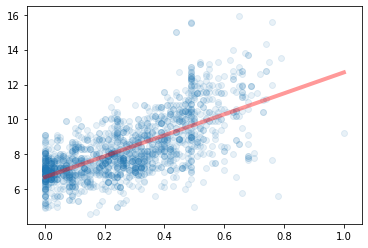

In [15]:
XX = np.linspace(0,1,200)
YY = w * XX + b
plt.scatter(wine_data['citric acid'], wine_data['fixed acidity'], alpha=0.1)
plt.plot(XX,YY,color='red',linewidth = 4, alpha=0.4)
plt.show()

# Exploratory Data Analysis using seaborn

For data analysis, Exploratory Data Analysis (EDA) can be our first step. EDA helps us to:

* To give insight into a data set.
* Understand the underlying structure.
* Extract important parameters and relationships that hold between them.
* Test underlying models/hypothesis.

In [16]:
import seaborn as sns
sns.set()

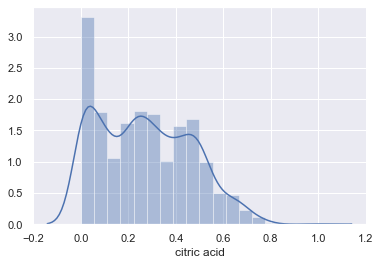

In [17]:
sns.distplot(wine_data['citric acid'])

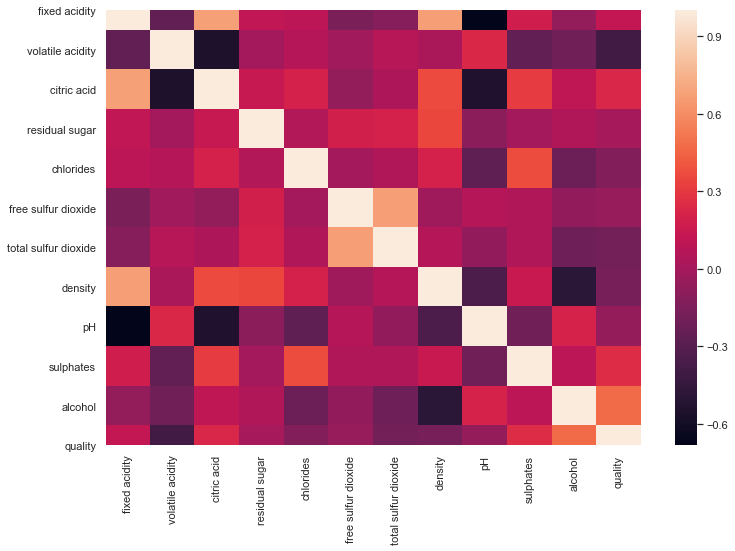

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(wine_data.corr(),annot=False)

## Linear regression fitting using the built-in library:

No need to be a hero every time. We can use scikit-learn's [`LinearRegression()` class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

We train the parameters by using the `fit` function and we use the function it learns using the `predict` function. 

In [19]:
from sklearn import linear_model

# model
acid_regression = linear_model.LinearRegression()

# training data
X_train = wine_data['citric acid']
y_train =  wine_data['fixed acidity']

# train/fit
acid_regression.fit(X_train, y_train)

# testing/CV
X_test = np.linspace(0,1,200)
y_pred = acid_regression.predict(X_test)

# visualize
plt.scatter(X_train, y_train, alpha=0.1)
plt.plot(X_test,y_pred, color='red',linewidth = 4, alpha=0.4)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[0.   0.   0.04 ... 0.13 0.12 0.47].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## In-class exercise: 
* Repeat the procedure above for `volatile acidity` and `fixed acidity` using both explicit formula and `scikit-learn`'s `LinearRegression()` class.
* Implement the mean square error measure for each training sample:
$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} 
\Big(y^{\text{Pred}}_i - y^{\text{Actual}}_i\Big)^2.
$$

## In-class exercise:
* Read the examples in [`LinearRegression()` class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), and apply scikit-learn's linear regression model on total sulfur dioxide vs pH in `winequality-red.csv`. We can first scatter plot to get a visual cue of whether these two quantities are related.

openinging price at 2029 would be around  [268.54248639]
Your investments will have a CAGR of  [16.42463622] %


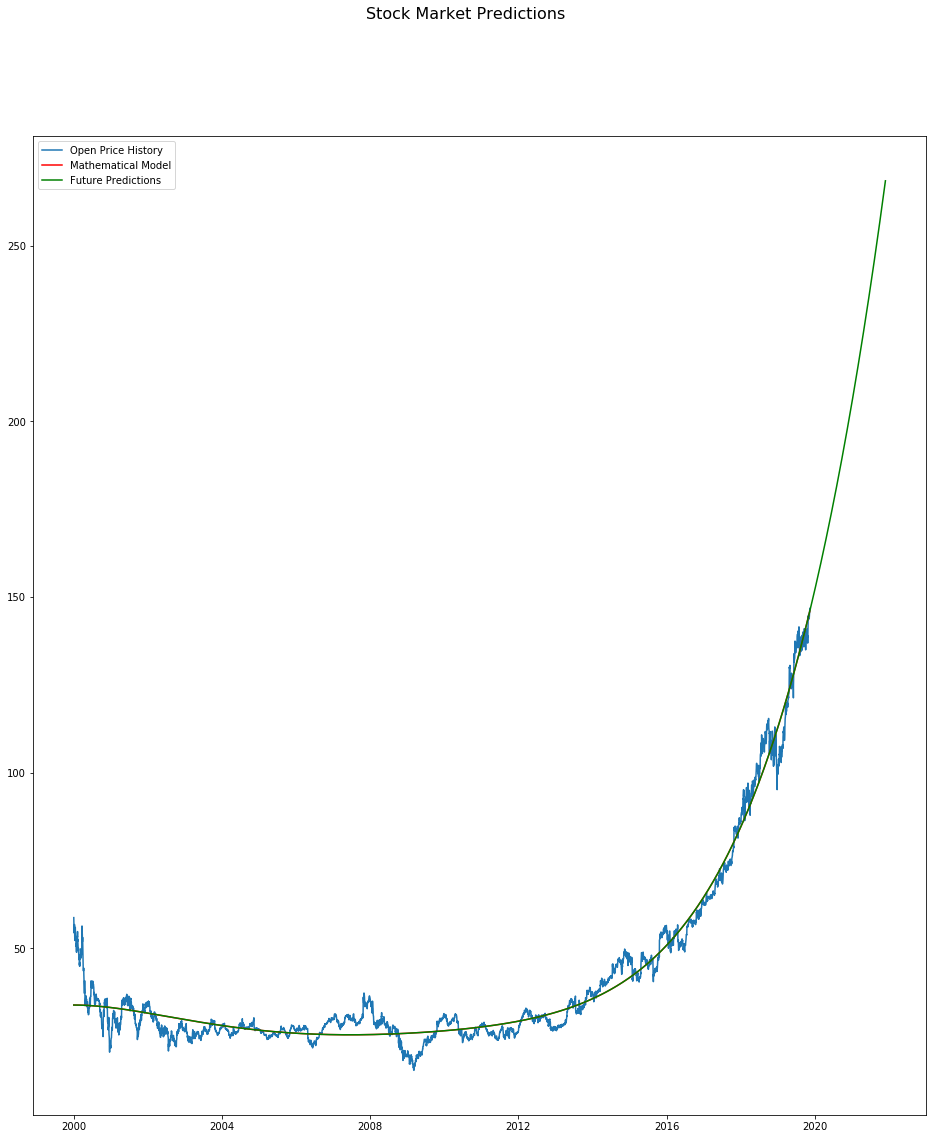